<a href="https://colab.research.google.com/github/NovelDS/Data-Visualization/blob/main/Copy_of_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
data_path = os.getcwd()
df_train = pd.read_csv('/content/drive/MyDrive/CS480KaggleCompetition/data/train.csv')
df_train['path'] = '/content/drive/MyDrive/CS480KaggleCompetition/data/train_images/' + df_train['id'].astype(str) + '.jpeg'
df_test = pd.read_csv('/content/drive/MyDrive/CS480KaggleCompetition/data/test.csv')
df_test['path'] = '/content/drive/MyDrive/CS480KaggleCompetition/data/test_images/' + df_test['id'].astype(str) + '.jpeg'

In [ ]:
df_train

,id,WORLDCLIM_BIO1_annual_mean_temperature,WORLDCLIM_BIO12_annual_precipitation,WORLDCLIM_BIO13.BIO14_delta_precipitation_of_wettest_and_dryest_month,WORLDCLIM_BIO15_precipitation_seasonality,WORLDCLIM_BIO4_temperature_seasonality,WORLDCLIM_BIO7_temperature_annual_range,SOIL_bdod_0.5cm_mean_0.01_deg,SOIL_bdod_100.200cm_mean_0.01_deg,SOIL_bdod_15.30cm_mean_0.01_deg,...,VOD_X_1997_2018_multiyear_mean_m10,VOD_X_1997_2018_multiyear_mean_m11,VOD_X_1997_2018_multiyear_mean_m12,X4_mean,X11_mean,X18_mean,X26_mean,X50_mean,X3112_mean,path
0,101801795,21.478968,772.404785,110.047623,56.210766,161.457764,13.886666,129,141,134,...,0.419139,0.404626,0.403707,1.035657,142.521015,19699.923668,3465.054691,15.842202,399384.490146,/content/drive/MyDrive/CS480KaggleCompetition/...
1,115813315,26.927639,1456.733276,329.366669,109.906487,178.745422,19.846668,139,140,140,...,0.368997,0.391109,0.407680,0.980728,153.726248,19699.721088,3462.940457,14.456965,398961.220402,/content/drive/MyDrive/CS480KaggleCompetition/...
2,173551949,27.336945,992.366638,248.166672,115.545128,292.781219,23.486668,144,143,148,...,0.289911,0.337495,0.393714,1.373851,137.016532,19702.276217,3459.473270,15.833161,397614.158049,/content/drive/MyDrive/CS480KaggleCompetition/...
3,148811120,25.558649,2246.017822,329.342224,56.563957,211.065521,16.768000,116,132,122,...,0.566320,0.556564,0.512105,0.790627,162.022021,19702.424188,3480.277051,14.684226,402414.611731,/content/drive/MyDrive/CS480KaggleCompetition/...
4,195108876,25.204723,2309.776123,284.576202,39.409706,36.499138,10.257143,100,113,105,...,0.628594,0.644814,0.654979,1.004912,154.428170,19701.160757,3487.689253,15.023368,404405.289639,/content/drive/MyDrive/CS480KaggleCompetition/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43358,172502909,25.551382,3294.408203,353.204071,47.970898,75.369301,12.087244,105,114,108,...,0.502823,0.497064,0.487178,1.032267,147.941775,19699.332901,3459.412566,14.273777,398262.005212,/content/drive/MyDrive/CS480KaggleCompetition/...
43359,183294324,24.163185,908.924438,238.119995,110.597702,120.009247,14.226222,132,141,137,...,0.417601,0.417884,0.424877,1.257809,143.195229,19716.303835,3548.911496,15.143285,402365.630661,/content/drive/MyDrive/CS480KaggleCompetition/...
43360,108577580,23.165426,57.146667,10.146667,52.789906,473.979675,26.604889,138,143,138,...,0.187665,0.178380,0.170875,0.897972,153.277343,19699.259529,3459.489300,14.899656,397843.108882,/content/drive/MyDrive/CS480KaggleCompetition/...
43361,139067673,15.147365,804.086731,163.000000,92.718536,182.917358,22.998470,122,128,129,...,0.424777,0.395074,0.371460,0.933451,153.229181,19699.217682,3459.441127,14.830224,397663.256983,/content/drive/MyDrive/CS480KaggleCompetition/...


In [ ]:
df_train['path'][0]

'/content/drive/MyDrive/CS480KaggleCompetition/data/train_images/101801795.jpeg'

In [ ]:
#all columns must be identical to be consider the same species
trait_columns = ['X4_mean', 'X11_mean', 'X18_mean', 'X50_mean', 'X26_mean', 'X3112_mean']
aux_columns = list(
            map(lambda x: x.replace("mean", "sd"), trait_columns)
        )
metadata_cols = df_train.drop(
                columns=["id", "path"] + trait_columns
            ).columns

In [ ]:
for col in trait_columns:
    upper_quantile = df_train[col].quantile(0.98)
    df_train = df_train[(df_train[col] < upper_quantile)]
    df_train = df_train[(df_train[col] > 0)]

# Data Visualization of variables to be predicted

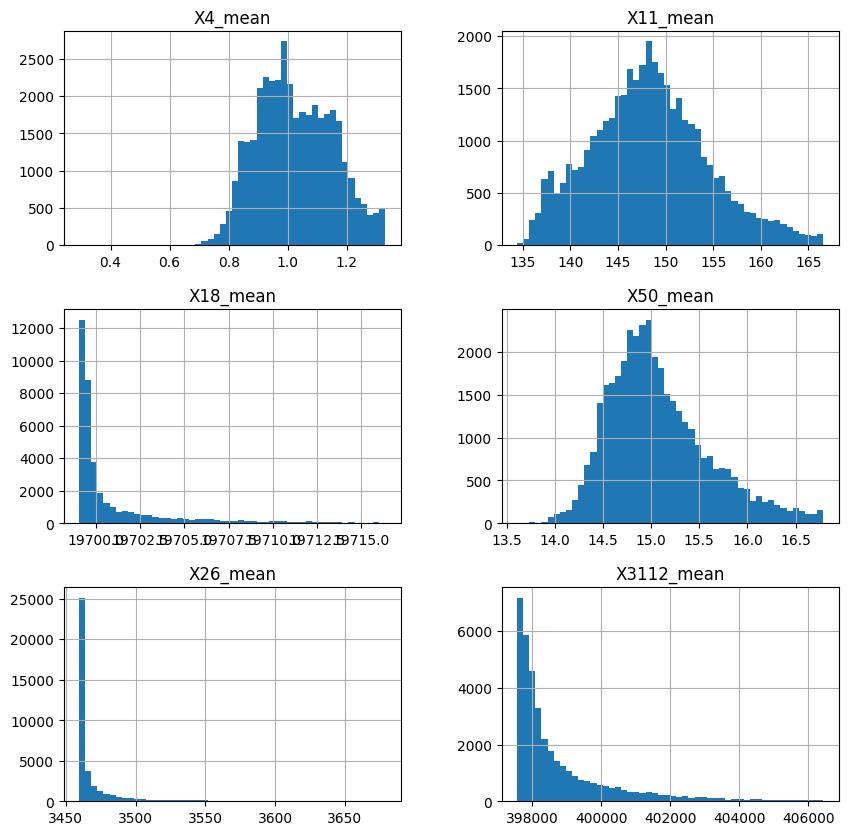

In [ ]:
df_train[trait_columns].hist(bins=50, figsize=(10, 10))
plt.show()


In [ ]:
def visualize(df_train, colQuery):
  climate_cols = df_train.filter(like=colQuery)
  fig, axs = plt.subplots(nrows=len(climate_cols.columns), ncols=1, figsize=(10, 70))

  # loop through each column and create a histogram
  for i, col in enumerate(climate_cols.columns):
      axs[i].hist(climate_cols[col], bins=50, alpha=0.7, edgecolor = 'black')
      axs[i].set_title(col)
      axs[i].set_xlabel('Value')
      axs[i].set_ylabel('Frequency')
      axs[i].grid(True, axis='y', linestyle='--', alpha=0.5)

  # adjust the layout to avoid overlapping titles
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


  # show the plot
  plt.show()

#WORLDCLIM_BIO* Data Visualization


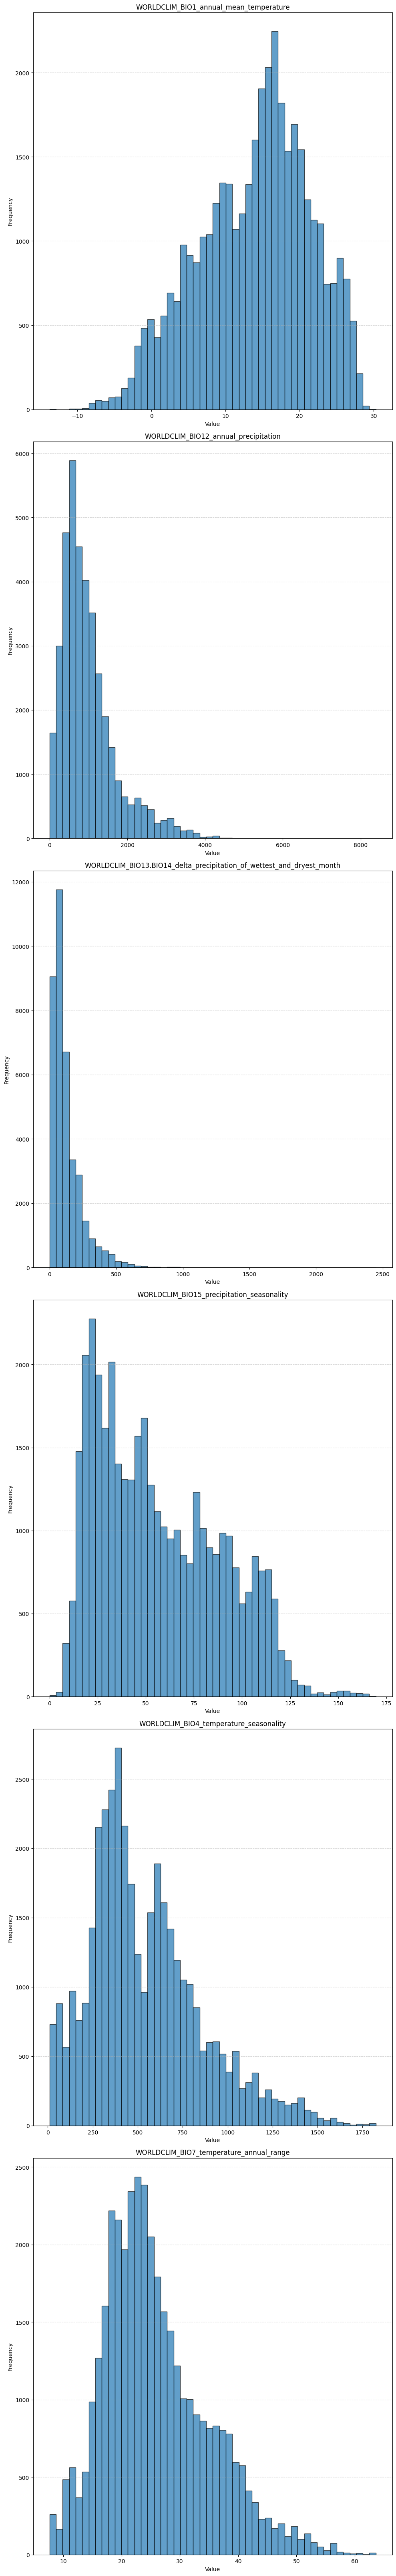

In [ ]:
visualize(df_train, 'WORLDCLIM_BIO')

#SOIL_bdod* Data Visualization


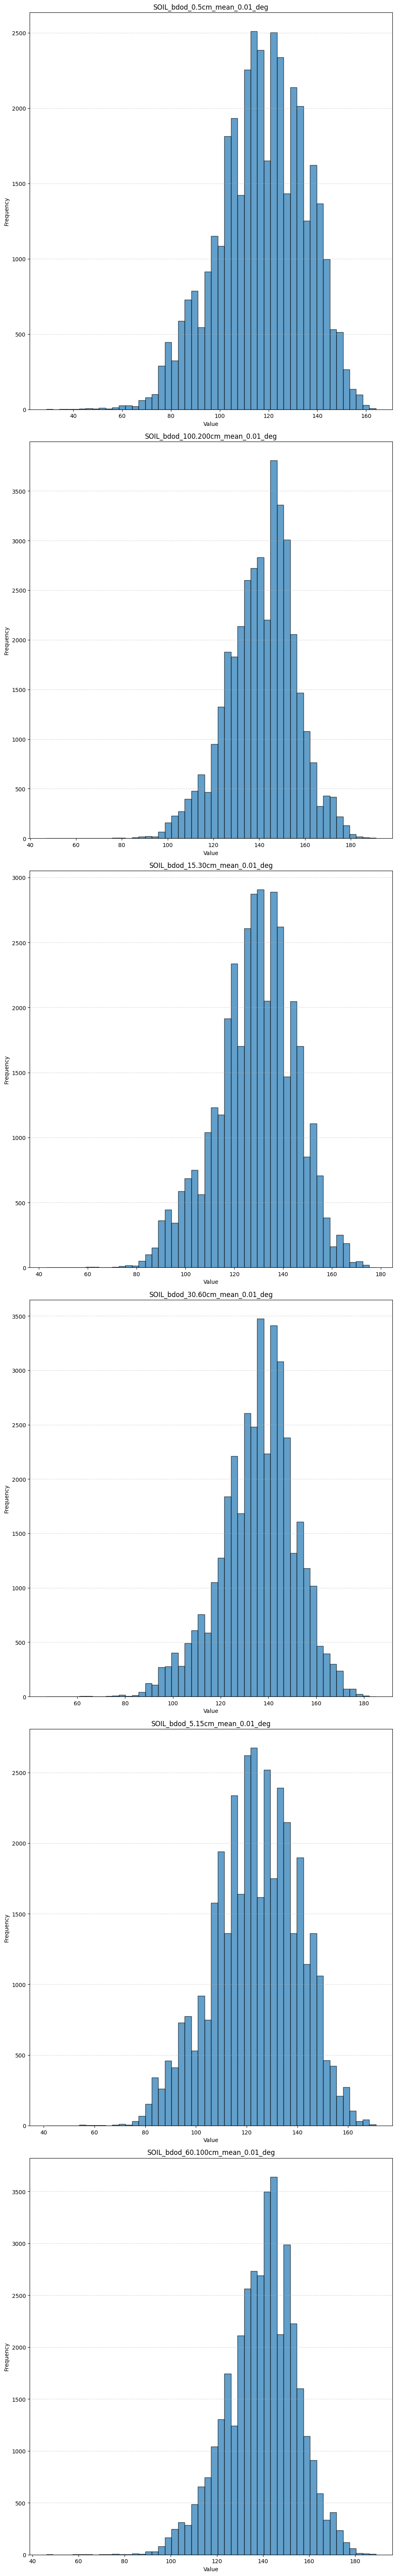

In [ ]:
visualize(df_train, 'SOIL_bdod')

# VOD Data Visualization

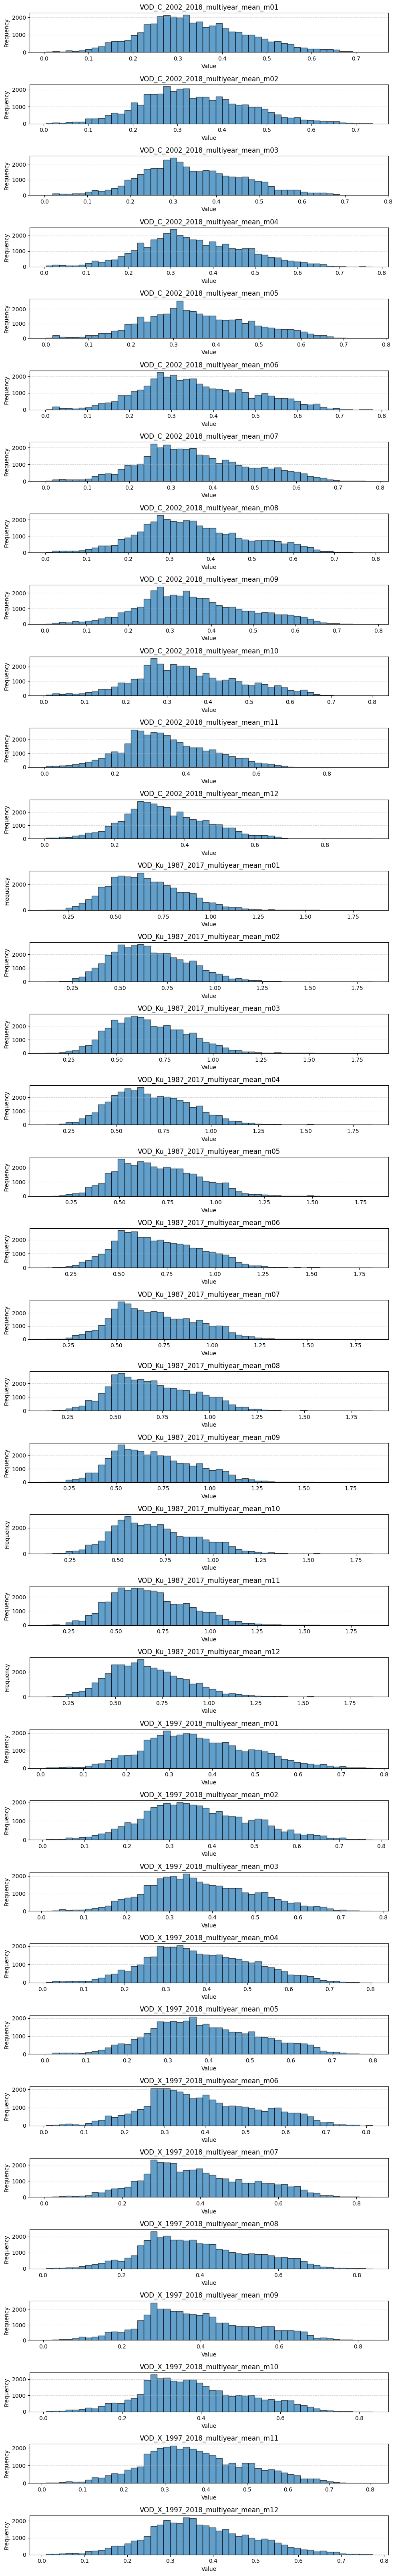

In [ ]:
visualize(df_train, 'VOD')

# MODI visualization

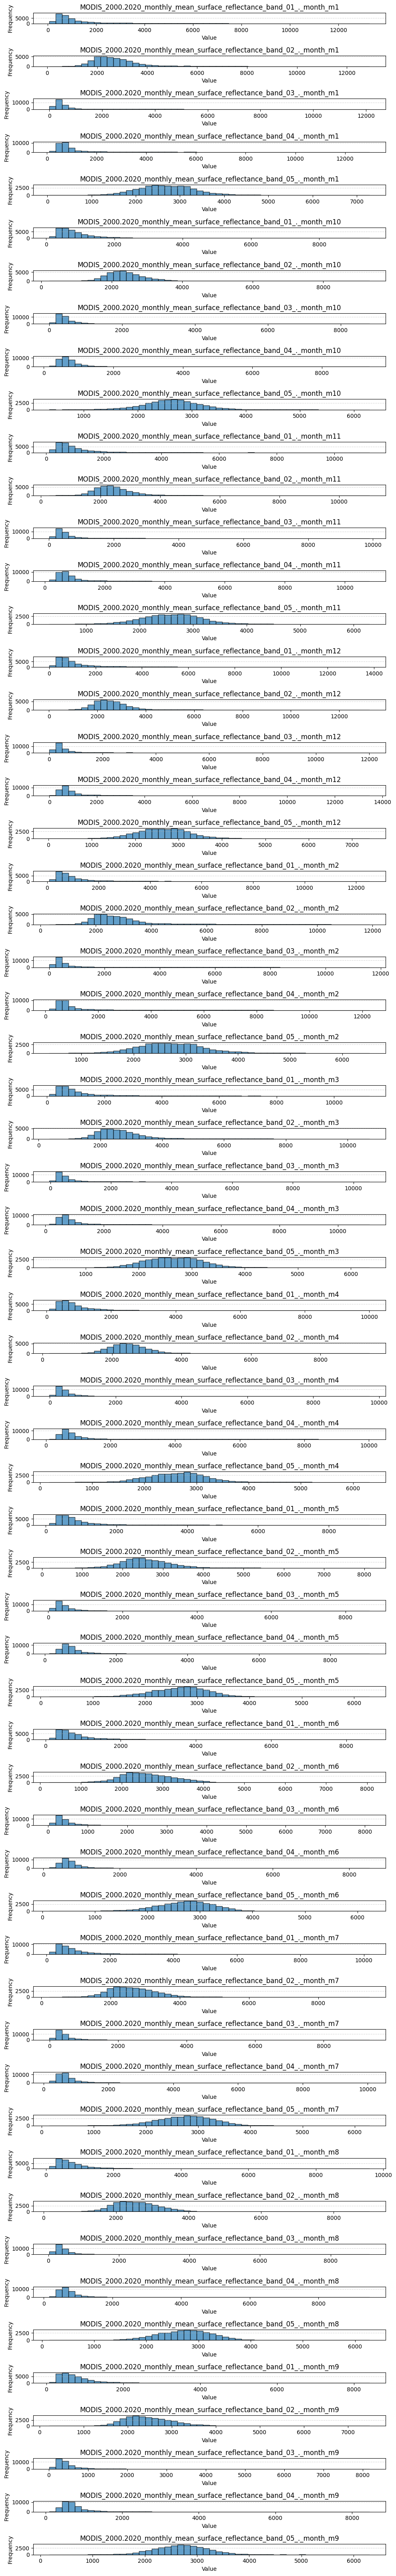

In [ ]:
visualize(df_train, 'MODIS')

In [ ]:
print(df_train.columns.tolist())

['id', 'WORLDCLIM_BIO1_annual_mean_temperature', 'WORLDCLIM_BIO12_annual_precipitation', 'WORLDCLIM_BIO13.BIO14_delta_precipitation_of_wettest_and_dryest_month', 'WORLDCLIM_BIO15_precipitation_seasonality', 'WORLDCLIM_BIO4_temperature_seasonality', 'WORLDCLIM_BIO7_temperature_annual_range', 'SOIL_bdod_0.5cm_mean_0.01_deg', 'SOIL_bdod_100.200cm_mean_0.01_deg', 'SOIL_bdod_15.30cm_mean_0.01_deg', 'SOIL_bdod_30.60cm_mean_0.01_deg', 'SOIL_bdod_5.15cm_mean_0.01_deg', 'SOIL_bdod_60.100cm_mean_0.01_deg', 'SOIL_cec_0.5cm_mean_0.01_deg', 'SOIL_cec_100.200cm_mean_0.01_deg', 'SOIL_cec_15.30cm_mean_0.01_deg', 'SOIL_cec_30.60cm_mean_0.01_deg', 'SOIL_cec_5.15cm_mean_0.01_deg', 'SOIL_cec_60.100cm_mean_0.01_deg', 'SOIL_cfvo_0.5cm_mean_0.01_deg', 'SOIL_cfvo_100.200cm_mean_0.01_deg', 'SOIL_cfvo_15.30cm_mean_0.01_deg', 'SOIL_cfvo_30.60cm_mean_0.01_deg', 'SOIL_cfvo_5.15cm_mean_0.01_deg', 'SOIL_cfvo_60.100cm_mean_0.01_deg', 'SOIL_clay_0.5cm_mean_0.01_deg', 'SOIL_clay_100.200cm_mean_0.01_deg', 'SOIL_clay_15.

In [ ]:
len(df_train.columns.tolist())

171

In [ ]:
# prompt: i have to make an image array of images stored at paths in the paths columns of df_train

from PIL import Image
import numpy as np

image_array = []
for path in df_train['path'][:10]:
  path = os.path.abspath(path)
  image = Image.open(path)
  image_array.append(np.array(image))

# image_array now contains a list of numpy arrays representing the images


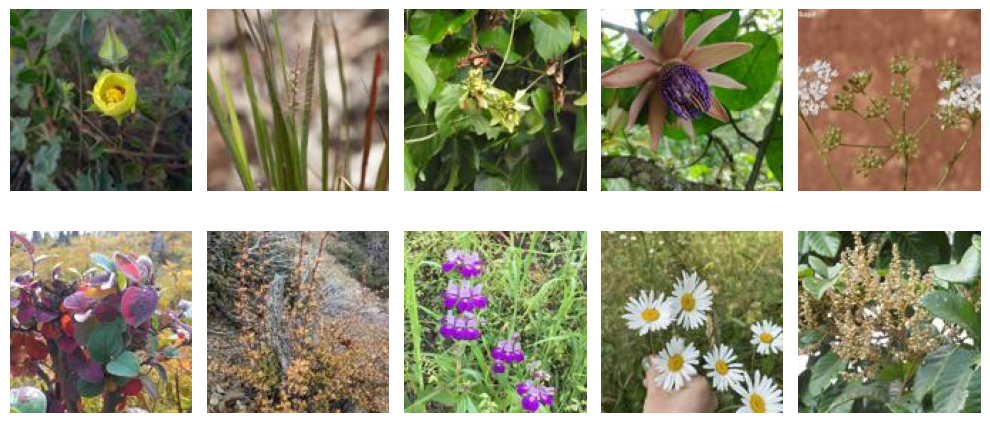

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming your images are stored in a numpy array called 'images'
# with shape (43000, height, width, channels)

# Select the first 10 images
selected_images = image_array

# Number of images per row and column
num_rows = 2
num_cols = 5

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 5))

# Iterate through the selected images and plot them in the grid
for i, ax in enumerate(axes.flat):
    ax.imshow(selected_images[i])
    ax.axis('off')

# Adjust layout and display the plot
fig.tight_layout()
plt.show()

In [ ]:
df_train['path'][0]

'/content/drive/MyDrive/CS480KaggleCompetition/data/train_images/101801795.jpeg'

In [ ]:
df_train.columns.tolist()[-7:-1]

['X4_mean', 'X11_mean', 'X18_mean', 'X26_mean', 'X50_mean', 'X3112_mean']

In [ ]:
df_train[df_train.columns.tolist()[-7]][0]

1.035656963314155

In [ ]:
df_train.iloc[0, -1]

'/content/drive/MyDrive/CS480KaggleCompetition/data/train_images/101801795.jpeg'

In [ ]:
tabular_columns = df_train.columns[1:-8]
print(tabular_columns)

Index(['WORLDCLIM_BIO1_annual_mean_temperature',
       'WORLDCLIM_BIO12_annual_precipitation',
       'WORLDCLIM_BIO13.BIO14_delta_precipitation_of_wettest_and_dryest_month',
       'WORLDCLIM_BIO15_precipitation_seasonality',
       'WORLDCLIM_BIO4_temperature_seasonality',
       'WORLDCLIM_BIO7_temperature_annual_range',
       'SOIL_bdod_0.5cm_mean_0.01_deg', 'SOIL_bdod_100.200cm_mean_0.01_deg',
       'SOIL_bdod_15.30cm_mean_0.01_deg', 'SOIL_bdod_30.60cm_mean_0.01_deg',
       ...
       'VOD_X_1997_2018_multiyear_mean_m02',
       'VOD_X_1997_2018_multiyear_mean_m03',
       'VOD_X_1997_2018_multiyear_mean_m04',
       'VOD_X_1997_2018_multiyear_mean_m05',
       'VOD_X_1997_2018_multiyear_mean_m06',
       'VOD_X_1997_2018_multiyear_mean_m07',
       'VOD_X_1997_2018_multiyear_mean_m08',
       'VOD_X_1997_2018_multiyear_mean_m09',
       'VOD_X_1997_2018_multiyear_mean_m10',
       'VOD_X_1997_2018_multiyear_mean_m11'],
      dtype='object', length=162)


In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import pandas as pd

In [ ]:
df_train.iloc[0]['path']

'/content/drive/MyDrive/CS480KaggleCompetition/data/train_images/101801795.jpeg'

In [ ]:

class PlantTraitsDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_path = self.df.iloc[idx]['path']
        image = Image.open(img_path).convert('RGB')

        if self.transform:
            image = self.transform(image)

        # Tabular data columns are from index 1 to -7 (exclusive)
        tabular_columns = self.df.columns[1:-7]
        tabular_data = torch.tensor(self.df.iloc[idx][tabular_columns].values.astype(np.float32), dtype=torch.float32)

        # Trait columns are from index -7 to -1 (exclusive)
        trait_columns = self.df.columns[-7:-1]
        traits = torch.tensor(self.df.iloc[idx][trait_columns].values.astype(np.float32), dtype=torch.float32)

        return image, tabular_data, traits

In [ ]:
df_train[:2]

,id,WORLDCLIM_BIO1_annual_mean_temperature,WORLDCLIM_BIO12_annual_precipitation,WORLDCLIM_BIO13.BIO14_delta_precipitation_of_wettest_and_dryest_month,WORLDCLIM_BIO15_precipitation_seasonality,WORLDCLIM_BIO4_temperature_seasonality,WORLDCLIM_BIO7_temperature_annual_range,SOIL_bdod_0.5cm_mean_0.01_deg,SOIL_bdod_100.200cm_mean_0.01_deg,SOIL_bdod_15.30cm_mean_0.01_deg,...,VOD_X_1997_2018_multiyear_mean_m10,VOD_X_1997_2018_multiyear_mean_m11,VOD_X_1997_2018_multiyear_mean_m12,X4_mean,X11_mean,X18_mean,X26_mean,X50_mean,X3112_mean,path
0,101801795.0,21.478968,772.404785,110.047623,56.210766,161.457764,13.886666,129.0,141.0,134.0,...,0.419139,0.404626,0.403707,1.035657,142.521015,19699.923668,3465.054691,15.842202,399384.490146,/content/drive/MyDrive/CS480KaggleCompetition/...
1,115813315.0,26.927639,1456.733276,329.366669,109.906487,178.745422,19.846668,139.0,140.0,140.0,...,0.368997,0.391109,0.407680,0.980728,153.726248,19699.721088,3462.940457,14.456965,398961.220402,/content/drive/MyDrive/CS480KaggleCompetition/...


In [ ]:
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(0.5),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset = PlantTraitsDataset(df_train[:10000], transform=train_transform)
val_df = df_train[10000:12000]
val_dataset = PlantTraitsDataset(val_df, transform=test_transform)
test_dataset = PlantTraitsDataset(df_test[:1000], transform=test_transform)

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
import torch
import torchvision.models as models

class ImageFeatureExtractor(torch.nn.Module):
    def __init__(self, pretrained=True):
        super(ImageFeatureExtractor, self).__init__()
        # Load a pre-trained ResNet50 model
        resnet = models.resnet50(pretrained=pretrained)

        # Remove the last fully connected layer
        self.features = torch.nn.Sequential(*list(resnet.children())[:-1])

    def forward(self, x):
        x = self.features(x)
        # Flatten the output for the fully connected layer
        return torch.flatten(x, 1)

# Create an instance of the image feature extractor
image_feature_extractor = ImageFeatureExtractor()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
class PlantTraitsPredictor(torch.nn.Module):
    def __init__(self, tabular_features):
        super(PlantTraitsPredictor, self).__init__()
        self.image_features = ImageFeatureExtractor()

        # Neural network for tabular data
        self.tabular_nn = torch.nn.Sequential(
            torch.nn.Linear(tabular_features, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 64)
        )

        # Combined neural network
        self.combined_nn = torch.nn.Sequential(
            torch.nn.Linear(2048 + 64, 512),
            torch.nn.ReLU(),
            torch.nn.Linear(512, 256),
            torch.nn.ReLU(),
            torch.nn.Linear(256, 6)  # 6 output traits
        )

    def forward(self, image, tabular_data):
        img_features = self.image_features(image)
        tab_features = self.tabular_nn(tabular_data)
        combined = torch.cat((img_features, tab_features), dim=1)
        return self.combined_nn(combined)

# Assuming you know the number of tabular features
num_tabular_features = len(df_train.columns[1:-7]) # Get the number of tabular features from your dataset
model = PlantTraitsPredictor(tabular_features=num_tabular_features)

In [ ]:
int_float_cols = df_train.select_dtypes(include=[np.int64, np.float64]).columns
df_train[int_float_cols] = df_train[int_float_cols].astype(np.float64)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/10], Train Loss: 17042283638.0000, Val Loss: 2651810108.0000, Avg R²: -2145658.6788
Epoch [2/10], Train Loss: 1951619931.5000, Val Loss: 818814604.0000, Avg R²: -1848620.3979
Epoch [3/10], Train Loss: 638342639.5000, Val Loss: 574298881.0000, Avg R²: -196493.1422
Epoch [4/10], Train Loss: 527592150.0000, Val Loss: 502184907.5000, Avg R²: -133999.1956
Epoch [5/10], Train Loss: 458726272.0000, Val Loss: 440518365.0000, Avg R²: -117771.3630
Epoch [6/10], Train Loss: 392797270.0000, Val Loss: 391187776.0000, Avg R²: -105011.4744
Epoch [7/10], Train Loss: 352939409.7500, Val Loss: 347047673.2500, Avg R²: -94734.9681
Epoch [8/10], Train Loss: 288966573.0000, Val Loss: 290681613.7500, Avg R²: -78397.8465
Epoch [9/10], Train Loss: 248781939.0000, Val Loss: 278507261.5000, Avg R²: -77822.2704
Epoch [10/10], Train Loss: 197485846.5000, Val Loss: 207981070.7500, Avg R²: -57051.3232


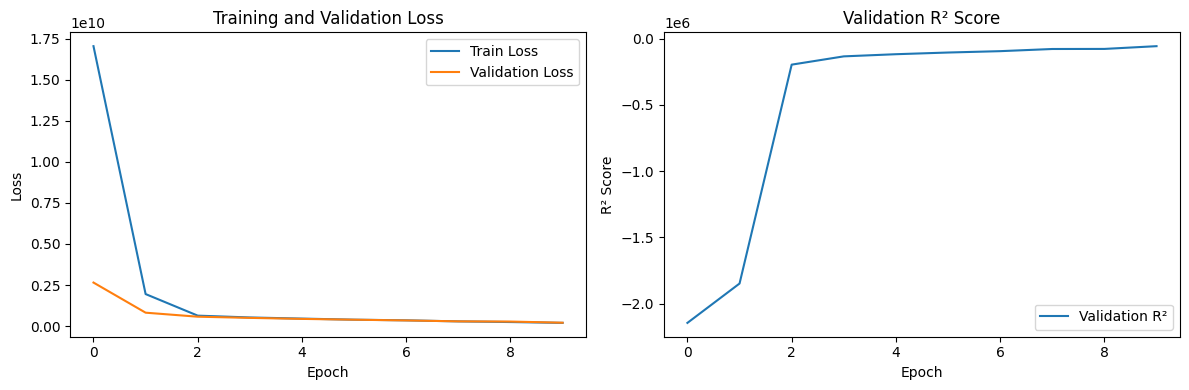

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


<All keys matched successfully>

In [ ]:
import torch
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

# Assuming we have already defined PlantTraitsDataset, ImageFeatureExtractor, and PlantTraitsPredictor classes

def train_and_evaluate(model, train_loader,val_loader ,num_epochs=100, patience=10):
    criterion = torch.nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=5)

    best_r2 = -float('inf')
    epochs_no_improve = 0
    history = {'train_loss': [], 'val_loss': [], 'val_r2': []}

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0
        for images, tabular_data, traits in train_loader:
            optimizer.zero_grad()
            outputs = model(images, tabular_data)
            loss = criterion(outputs, traits)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        model.eval()
        val_loss = 0
        all_predictions = []
        all_targets = []

        with torch.no_grad():
            for images, tabular_data, traits in val_loader:
                outputs = model(images, tabular_data)
                val_loss += criterion(outputs, traits).item()
                all_predictions.append(outputs.cpu().numpy())
                all_targets.append(traits.cpu().numpy())

        all_predictions = np.concatenate(all_predictions)
        all_targets = np.concatenate(all_targets)

        r2_scores = []
        for i in range(6):
            r2 = r2_score(all_targets[:, i], all_predictions[:, i])
            r2_scores.append(r2)

        avg_r2 = np.mean(r2_scores)
        scheduler.step(avg_r2)

        history['train_loss'].append(train_loss / len(train_loader))
        history['val_loss'].append(val_loss / len(val_loader))
        history['val_r2'].append(avg_r2)

        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss/len(train_loader):.4f}, '
              f'Val Loss: {val_loss/len(val_loader):.4f}, Avg R²: {avg_r2:.4f}')

        if avg_r2 > best_r2:
            best_r2 = avg_r2
            epochs_no_improve = 0
            torch.save(model.state_dict(), 'best_model.pth')
        else:
            epochs_no_improve += 1

        if epochs_no_improve == patience:
            print(f'Early stopping triggered after {epoch+1} epochs')
            break

    return history

# Train the model
model = PlantTraitsPredictor(tabular_features=num_tabular_features)
history = train_and_evaluate(model, train_loader, val_loader, 10)

# Plot the results
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(history['val_r2'], label='Validation R²')
plt.xlabel('Epoch')
plt.ylabel('R² Score')
plt.legend()
plt.title('Validation R² Score')

plt.tight_layout()
plt.show()

# Load the best model and evaluate on the test set
best_model = PlantTraitsPredictor(tabular_features=len(train_dataset[0][1]))
best_model.load_state_dict(torch.load('best_model.pth'))



In [ ]:
best_model.eval()
all_predictions = []
all_targets = []

with torch.no_grad():
    for images, tabular_data, traits in test_loader:
        outputs = best_model(images, tabular_data)
        all_predictions.append(outputs.cpu().numpy())
        all_targets.append(traits.cpu().numpy())

all_predictions = np.concatenate(all_predictions)
all_targets = np.concatenate(all_targets)

r2_scores = []
for i in range(6):
    r2 = r2_score(all_targets[:, i], all_predictions[:, i])
    r2_scores.append(r2)
    print(f'Trait {i+1} R² Score: {r2:.4f}')

print(f'Average R² Score: {np.mean(r2_scores):.4f}')

# Plot individual trait R² scores
plt.figure(figsize=(10, 6))
plt.bar(range(1, 7), r2_scores)
plt.xlabel('Trait')
plt.ylabel('R² Score')
plt.title('R² Scores for Individual Traits')
plt.xticks(range(1, 7))
plt.ylim(0, 1)
for i, v in enumerate(r2_scores):
    plt.text(i+1, v+0.01, f'{v:.2f}', ha='center')
plt.show()